:Написать Сверточную нейронную сеть классификатор, на базе датасета cifar10


Epoch 1/7
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5387 - accuracy: 0.4382 - val_loss: 1.3449 - val_accuracy: 0.5189
Epoch 2/7
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1816 - accuracy: 0.5798 - val_loss: 1.0975 - val_accuracy: 0.6085
Epoch 3/7
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0294 - accuracy: 0.6380 - val_loss: 0.9806 - val_accuracy: 0.6569
Epoch 4/7
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9227 - accuracy: 0.6768 - val_loss: 0.9431 - val_accuracy: 0.6718
Epoch 5/7
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8432 - accuracy: 0.7056 - val_loss: 0.8965 - val_accuracy: 0.6850
Epoch 6/7
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7885 - accuracy: 0.7247 - val_loss: 0.8729 - val_accuracy: 0.6927
Epoch 7/7
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7307 - accuracy: 0.7432 - val_loss: 0.8847 - val_ac

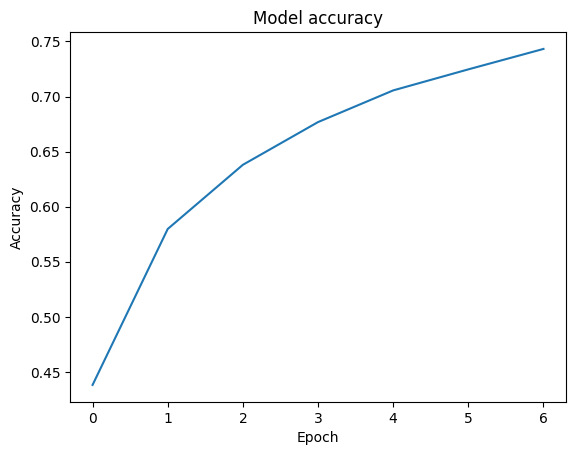

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Загрузка датасета CIFAR10, Загрузка датасета CIFAR10 с помощью функции mnist.loaddata()
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализация пикселей в диапазоне от 0 до 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#В этой строке выполняется нормализация пикселей изображений, приводя их значения к диапазону от 0 до 1 путем деления на 255.


# Создание модели
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #свёрточные слои
model.add(layers.MaxPooling2D((2, 2))) #пулинг
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #свёрточные слои
model.add(layers.MaxPooling2D((2, 2))) #пулинг
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #свёрточные слои
#В этих строках создается модель нейронной сети с использованием Sequential API.
#Модель состоит из трех сверточных слоев (`Conv2D`), каждый из которых с последующим слоем пулинга (`MaxPooling2D`).
#Функция активации в сверточных слоях - ReLU.

# Добавление двух полносвязных слоев классификации
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
#Здесь добавляются два полносвязанных слоя (`Dense`). Первый слой плоскости (`Flatten`) преобразует данные из формы матрицы в одномерный массив.
#Затем добавляется скрытый слой с 64 нейронами и функцией активации ReLU, а также выходной слой с 10 нейронами (по числу классов в датасете CIFAR-10).


# Компиляция модели
model.compile(optimizer='adam', #оптимизатор
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #функция потерь
              metrics=['accuracy']) #метрикой точности

# Обучение модели
history = model.fit(train_images, train_labels, epochs=7,
                    validation_data=(test_images, test_labels))
#В этой строке модель обучается на обучающем датасете в течение n эпох,
#с использованием данных валидации из тестового датасета для оценки производительности модели на каждой эпохе.
#Результаты обучения сохраняются в переменную `history'

# Оценка модели
#Эта строка оценивает точность модели на тестовом датасете и выводит ее на экран.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #verbose-контроль уровня вывода информации о прогрессе обучения
print('\nTest accuracy:', test_acc)

# Анализ результатов
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
#График показывает изменение точности модели на обучающем наборе данных на протяжении каждой эпохи.